# 📘 Sentiment Analysis with Python

Welcome to this guide to sentiment analysis using Python! This is made for beginners and advanced programmers alike, so feel free to grab what you need, or read through the explanations for more help. We'll go through what you need to set up and building your own sentiment classifier.

##  1. Introduction

**What is Sentiment Analysis?**

Sentiment analysis is a natural language processing (NLP) technique used to determine whether data is positive, negative, or neutral.

It's commonly used to understand customer feedback, monitor social media, and analyse survey results.

In this guide, we'll:
- Clean and prepare text data
- Perform basic sentiment analysis using prebuilt tools
- Build a machine learning model to classify sentiment
- Test it with real and custom data

Let’s get started!

## 2. Prerequisites

**We'll use the following Python libraries:**
- `pandas`, `numpy` – for data manipulation
- `nltk`, `TextBlob`, or `VADER` – for NLP tasks
- `sklearn` – for machine learning
- `matplotlib`, `seaborn`, `wordcloud` – for visualisation

In [56]:
# Environment Setup - if you're working in this notebook, you'll only need to run this once
!pip install pandas numpy matplotlib seaborn nltk textblob scikit-learn wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\0911a\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\0911a\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# 3. Load Dataset

In [105]:
# this is just a bunch of tweets, but you can replace this with a file path to a csv file containing other data
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin1') #NB: the first line of the file should be the header for each row
df.head()

,sentiment,id,date,query,user,text
0,0,1559645135,Sun Apr 19 11:40:58 PDT 2009,NO_QUERY,MaraATL,Trying to download ares and limewire but it wo...
1,0,1559645222,Sun Apr 19 11:40:58 PDT 2009,NO_QUERY,LinaMeka,can't believe I bought a pocketwatch today...n...
2,0,1559645233,Sun Apr 19 11:40:58 PDT 2009,NO_QUERY,algk92,@hutchy11 pub work lol please go yu no yu wan...
3,0,1559645376,Sun Apr 19 11:40:59 PDT 2009,NO_QUERY,davdphotography,This trip to California is wrapping up soon o...
4,0,1559645471,Sun Apr 19 11:41:02 PDT 2009,NO_QUERY,Smophs,"And now my dad's shouting, he scares the shit ..."


# 4. Explore the Dataset
We're checking for missing values in the first line and the second makes a bar chart to see how many data points are positive/negative. Getting a sense of the balance in your data set is important - if you use it to predict or train a model using an unbalanced set, it could skew your results!

For our data set, the sentiment rating works like this: (0 = negative, 2 = neutral, 4 = positive). You should see that there are mostly negative tweets in this dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937606 entries, 0 to 937605
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sentiment  937606 non-null  int64 
 1   id         937606 non-null  int64 
 2   date       937606 non-null  object
 3   query      937606 non-null  object
 4   user       937606 non-null  object
 5   text       937606 non-null  object
dtypes: int64(2), object(4)
memory usage: 42.9+ MB


<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment'>

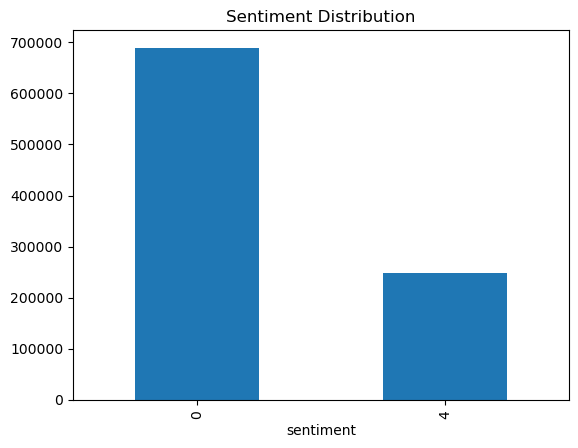

In [107]:
df.info() #check for missing values
df['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution') # this produces a bar chart 

# 5. Text Cleaning and Preprocessing
Before we can do any analysis, we have to 'clean' the data - remove anything irrelevant. Here, we're making everything lowercase, removing any links and stemming. Stemming means reducing words to their root form so suffixes like -ing don't have an unwanted effect on our model.

In [109]:
# Text Cleaning + Preprocessing
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|@\w+|#\w+|[^a-z\s]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_text)
df[['text', 'clean_text']].head()

,text,clean_text
0,Trying to download ares and limewire but it wo...,tri download are limewir wont work
1,can't believe I bought a pocketwatch today...n...,cant believ bought pocketwatch todaynow train ...
2,@hutchy11 pub work lol please go yu no yu wan...,pub work lol pleas go yu yu want realli haha
3,This trip to California is wrapping up soon o...,trip california wrap soon hour till flight
4,"And now my dad's shouting, he scares the shit ...",dad shout scare shit he angri


# 6. Wordcloud
We can make a wordcloud to see what words are the most frequent, which can tell us what people are interested in!

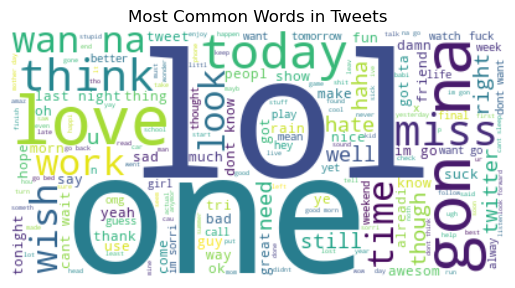

In [110]:
# WordCloud
text = " ".join(df['clean_text'])
wc = WordCloud(background_color='white').generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Tweets")
plt.show()

# 7. Sentiment Analysis with TextBlob
TetxBlob is a library in python that helps with NLP tasks. In the function below, for each bit of text, TextBlob assigns a polarity score where >0 is positve, <0 is negative and 0 is neutral.

In [111]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

df['blob_sentiment'] = df['text'].apply(get_sentiment)
df[['text', 'blob_sentiment']].head()

,text,blob_sentiment
0,Trying to download ares and limewire but it wo...,neutral
1,can't believe I bought a pocketwatch today...n...,neutral
2,@hutchy11 pub work lol please go yu no yu wan...,positive
3,This trip to California is wrapping up soon o...,neutral
4,"And now my dad's shouting, he scares the shit ...",negative


# 8. Machine Learning Based Classifer
We can train an ML model using labelled data.
Steps:
1. Convert cleaned text into numeric form using TfidfVectorizer
2. Split data into testing/training sets
3. Train a model on the data
4. Evaluate the model

This is useful if we need our program to capture specific patterns from our data and adapt to context.

In [112]:
df['label'] = df['blob_sentiment'].map({'positive': 1, 'neutral': 0,'negative': -1})
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
print(X_train_vec.shape)
print(X_test_vec.shape)
model = MultinomialNB()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

(750084, 203872)
(187522, 203872)
Accuracy: 0.7560446240974392
[[26920  5270 16638]
 [ 1579 48786 16902]
 [ 1731  3627 66069]]
              precision    recall  f1-score   support

          -1       0.89      0.55      0.68     48828
           0       0.85      0.73      0.78     67267
           1       0.66      0.92      0.77     71427

    accuracy                           0.76    187522
   macro avg       0.80      0.73      0.74    187522
weighted avg       0.79      0.76      0.75    187522



# 9. Test with Custom Text

In [113]:
def predict_sentiment(text):
    cleaned = clean_text(text)
    vec = vectorizer.transform([cleaned])
    pred = model.predict(vec)[0]
    return "Positive" if pred == 1 else "Negative"

# Try it!
predict_sentiment("I really hate this product, it's terrible!")


'Negative'

## 💡 Applications of Sentiment Analysis

- 📦 Product Reviews: Understand customer satisfaction
- 💬 Social Media: Monitor public opinion
- 🧠 Market Research: Identify trends
- 🏛️ Politics: Gauge speech or policy reception
- 📰 News: Understand article tone

## 🧭 Next Steps

- Explore deep learning models like LSTM or BERT
- Try multilingual datasets
- Learn about aspect-based sentiment analysis

**Resources:**
- https://textblob.readthedocs.io/
- https://github.com/cjhutto/vaderSentiment
- https://ai.stanford.edu/~amaas/data/sentiment/